#***Credit Card Approval Prediction***

A Credit Card Dataset for Machine Learning

###**Content**

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

###**Objective**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

###**Dataset link**
https://www.kaggle.com/rikdifos/credit-card-approval-prediction


###**Presentation link**
https://docs.google.com/presentation/d/1qzUlbIVwKzXx5QqURyOAHTgWmFlN3TnJTgRnMOdQOSM/edit#slide=id.gd39b82ed41_1_0

#***Importing the libraries***

In [ ]:
# !pip install lazypredict
!pip install feature_engine


     |████████████████████████████████| 184kB 29.9MB/s 
     |████████████████████████████████| 9.5MB 17.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install imbalanced-learn==0.7.0

     |████████████████████████████████| 174kB 26.1MB/s 
     |████████████████████████████████| 22.3MB 53.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
# !pip install catboost

In [1]:
#Imports for heldel, manipoletion and visualization of the Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
from io import BytesIO
#import json

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

#Impports for classification model assessmenton of the Data
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, make_scorer
# from lazypredict.Supervised import LazyClassifier

#Imports for model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit

#Impports for classification models on the Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier, Pool, cv


#Imports for feature selection
from sklearn.feature_selection import VarianceThreshold
from feature_engine.selection import DropConstantFeatures
from feature_engine.wrappers import SklearnTransformerWrapper


#Imports For the preproccessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import compute_sample_weight

#Imports For Imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
%matplotlib inline

plt.style.use('seaborn')

ModuleNotFoundError: ignored

In [ ]:
# SCORERS

#***Create the Dataset (df_app.csv)***

This is a pre cleaning section in which we cleanse our data.

And create a combined csv file for further analysis 'df_app.csv'

The phases we perform are as follows:



1.   import raw csv files (one for x data and the other for y data)
2.   map y data as follows: (x,c)->-1 
3.   calculate the max status(y) for each ID
4.   merge the two datasets by ID
5.   drop duplicated data (making sure we keep for each row which is duplicated the higher y value)
6.   export the dataframe to df_app.csv for further analysis




In [ ]:
#application_record = pd.read_csv('application_record.csv')
#credit_record = pd.read_csv('credit_record.csv')

regular approach

In [ ]:
#application_record.shape

In [ ]:
#application_record.head()

In [ ]:
#credit_record.shape

In [ ]:
#credit_record.head()

In [ ]:
#credit_record.STATUS.replace('C',-1, inplace=True)
#credit_record.STATUS.replace('X',-1, inplace=True)

In [ ]:
#credit_record['STATUS'] = credit_record.STATUS.apply(pd.to_numeric)

In [ ]:
#credit_record.groupby('ID')['STATUS'].max().value_counts()

In [ ]:
#credit_record = credit_record.groupby('ID')['STATUS'].max().reset_index()

In [ ]:
#credit_record.shape

In [ ]:
#merged = application_record.merge(credit_record, how='inner', on='ID')

In [ ]:
#merged.shape

In [ ]:
#columns_duplicates_check = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
#       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
#       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
#       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
#       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']

In [ ]:
#df_app = merged

In [ ]:
#df_app.sort_values(by='STATUS', ascending=False, inplace=True)

In [ ]:
#df_app = df_app.drop_duplicates(subset=columns_duplicates_check, keep='first')

In [ ]:
#df_app.reset_index(inplace=True, drop=True)

In [ ]:
#df_app.info()

In [ ]:
#df_app['STATUS'].value_counts()

In [ ]:
#df_app

In [ ]:
#df_app.to_csv('df_app.csv', index=False)

# ***Importing the constructed dataset (df_app.csv)***

Run the following cells below to get the data for this classification.

Note: after getting the data we are preforming an EDA prossece befor the classification.

In [3]:
url = 'https://raw.githubusercontent.com/danihello/Bank_Marketing/main/df_app.csv'

resp = requests.get(url)
text = resp.text

with open('df_app.csv', 'w') as fh:
    fh.write(text)
  
df_app = pd.read_csv('df_app.csv')

##***Dataset Structure***

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9728 non-null   int64  
 1   CODE_GENDER          9728 non-null   object 
 2   FLAG_OWN_CAR         9728 non-null   object 
 3   FLAG_OWN_REALTY      9728 non-null   object 
 4   CNT_CHILDREN         9728 non-null   int64  
 5   AMT_INCOME_TOTAL     9728 non-null   float64
 6   NAME_INCOME_TYPE     9728 non-null   object 
 7   NAME_EDUCATION_TYPE  9728 non-null   object 
 8   NAME_FAMILY_STATUS   9728 non-null   object 
 9   NAME_HOUSING_TYPE    9728 non-null   object 
 10  DAYS_BIRTH           9728 non-null   int64  
 11  DAYS_EMPLOYED        9728 non-null   int64  
 12  FLAG_MOBIL           9728 non-null   int64  
 13  FLAG_WORK_PHONE      9728 non-null   int64  
 14  FLAG_PHONE           9728 non-null   int64  
 15  FLAG_EMAIL           9728 non-null   i

In [ ]:
df_app.nunique()

ID                     9728
CODE_GENDER               2
FLAG_OWN_CAR              2
FLAG_OWN_REALTY           2
CNT_CHILDREN              9
AMT_INCOME_TOTAL        265
NAME_INCOME_TYPE          5
NAME_EDUCATION_TYPE       5
NAME_FAMILY_STATUS        5
NAME_HOUSING_TYPE         6
DAYS_BIRTH             7183
DAYS_EMPLOYED          3640
FLAG_MOBIL                1
FLAG_WORK_PHONE           2
FLAG_PHONE                2
FLAG_EMAIL                2
OCCUPATION_TYPE          18
CNT_FAM_MEMBERS          10
STATUS                    7
dtype: int64

In [ ]:
df_app['STATUS'].value_counts(normalize=True)

 0    0.696032
 1    0.201686
-1    0.056846
 2    0.022924
 5    0.013877
 3    0.006065
 4    0.002570
Name: STATUS, dtype: float64

###***Application Record***

- ID -	Client number	
- CODE GENDER - Gender	
- FLAG OWN CAR - Is there a car	
- FLAG OWN REALTY	- Is there a property	
- CNT CHILDREN - Number of children	
- AMT INCOME TOTAL - Annual income	
- NAME INCOME TYPE - Income category	
- NAME EDUCATION TYPE -	Education level	
- NAME FAMILY STATUS - Marital status	
- NAME HOUSING TYPE -	Way of living	
- DAYS BIRTH - Birthday	Count backwards from current day (0), -1 means yesterday
- DAYS EMPLOYED -	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
- FLAG MOBIL - Is there a mobile phone	
- FLAG WORK PHONE -	Is there a work phone	
- FLAG PHONE - Is there a phone	
- FLAG EMAIL - Is there an email	
- OCCUPATION TYPE -	Occupation	
- CNT AM MEMBERS - Family size

###***Credit Record***

- ID - Client number	
- MONTHS BALANCE - Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- STATUS - Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

#***Preproccessing***

Transform days birth into Age

In [ ]:
df_app['Age'] = df_app['DAYS_BIRTH']/(-365)

Transform days of employed into years fo employed and currently employed

In [ ]:
def Years_employed(row):
  if row.loc['DAYS_EMPLOYED']<0:
    return  row.loc['DAYS_EMPLOYED']/(-365)
  else :
    return 0
def currently_employed(row):
  if row.loc['DAYS_EMPLOYED']<0:
    return 1
  else:
    return 0

In [ ]:
df_app['Years_employed'] = df_app.apply(Years_employed, axis=1)
df_app['currently_employed'] = df_app.apply(currently_employed, axis=1)
df_app.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH'], inplace=True)

Dropping of 'Student' and 'Academic degree'.

In [ ]:
mask_to_drop = df_app.loc[(df_app['NAME_EDUCATION_TYPE']=="Academic degree") | (df_app['NAME_INCOME_TYPE']=='Student')].index

In [ ]:
df_app.drop(index=mask_to_drop, inplace=True)

Dropping of Mobile column Since it have only one unique value.

In [ ]:
df_app[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']] = df_app[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].astype('O')

In [ ]:
df_app.drop(columns=['ID', 'FLAG_MOBIL'], inplace=True)

*Creating different Y*

- 0 --> bad customer
- 1 --> good customer

In [ ]:
good = 1
bad = 0

In [ ]:
def create_Y1(row):
  if row.loc['STATUS'] != -1:
    return bad
  else:
    return good

def create_Y2(row):
  if row.loc['STATUS'] not in  [-1,0]:
    return bad
  else:
    return good

def create_Y3(row):
  if row.loc['STATUS'] not in  [-1,0,1]:
    return bad
  else:
    return good

def create_Y4(row):
  if row.loc['STATUS'] not in  [-1,0,1,2]:
    return bad
  else:
    return good

def create_Y5(row):
  if row.loc['STATUS'] not in  [-1,0,1,2,3]:
    return bad
  else:
    return good

def create_Y6(row):
  if row.loc['STATUS'] not  in  [-1,0,1,2,3,4]:
    return bad
  else:
    return good

df_y = pd.DataFrame()
for i, func in enumerate([create_Y1, create_Y2, create_Y3, create_Y4, create_Y5, create_Y6],1):
    column = 'y_'+str(i)
    df_y[column] = df_app.apply(func, axis=1)

(_,y1), (_,y2), (_,y3), (_,y4), (_,y5), (_,y6) = df_y.iteritems()

Creating X (independent variables)

In [ ]:
X = df_app.drop(['STATUS'], axis=1)

#***Exploratory data analysis (EDA)***

##**analyzing feature distribution with respect to target variable (y3)**

In [ ]:
df_app_eda = df_app.copy()

In [ ]:
df_app_eda.drop(columns=['STATUS'], inplace=True)

In [ ]:
df_app_eda = pd.concat([df_app_eda, y3], axis=1)

In [ ]:
df_app_eda.columns = (
              'Male',
              'Car',
              'Realty',
              'children_count',
              'income_amount',
              'income_type',
              'education_type',
              'Family_status',
              'Housing_type',
              'Work_phone',
              'Phone',
              'Email',
              'Occupation_type',
              'Count_family_members',
              'Age',
              'Years_employed',
              'currently_employed',
              'Reject'
              )

In [ ]:
df_app_eda['Reject'] = df_app_eda['Reject'].map({0:1, 1:0})

In [ ]:
binary_features = ['Male', 'Car', 'Realty', 'Work_phone', 'Phone', 'Email', 'currently_employed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-pack

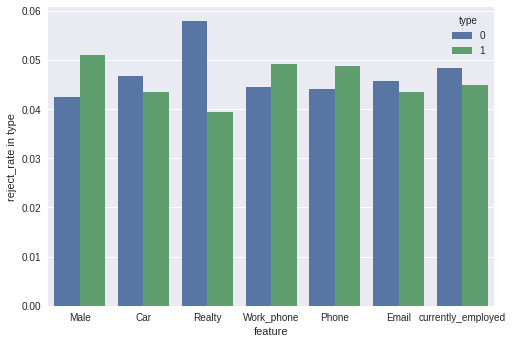

,feature,type,reject_rate in type,count,Reject_count
0,Male,0,0.042496,6330,269
1,Male,1,0.051048,3389,173
2,Car,0,0.046689,6147,287
3,Car,1,0.043393,3572,155
4,Realty,0,0.057921,3194,185
5,Realty,1,0.039387,6525,257
6,Work_phone,0,0.044444,7605,338
7,Work_phone,1,0.049196,2114,104
8,Phone,0,0.044181,6926,306
9,Phone,1,0.048693,2793,136


In [ ]:
binary_df = df_app_eda[binary_features+['Reject']].replace('F', 0).replace('M', 1).replace('Y', 1).replace('N', 0)
dict_list = []
for feature in binary_features:
    for one_type in [0, 1]:
        dict_list.append({'feature': feature,
                          'type': one_type,
                          'reject_rate in type': len(binary_df[binary_df[feature]==one_type][binary_df.Reject==1])/len(binary_df[binary_df[feature]==one_type]),
                          'count': len(binary_df[binary_df[feature]==one_type]),
                          'Reject_count': len(binary_df[binary_df[feature]==one_type][binary_df.Reject==1])
                         })

group_binary = pd.DataFrame.from_dict(dict_list)
sns.barplot(x="feature", y="reject_rate in type", hue="type", data=group_binary)
plt.show()
group_binary

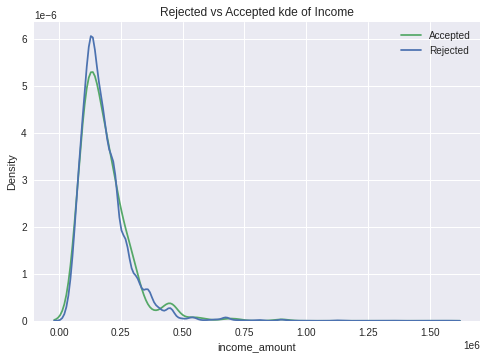

In [ ]:
sns.kdeplot(data=df_app_eda, x='income_amount', hue='Reject', cumulative=False, common_norm=False, common_grid=True)
plt.title("Rejected vs Accepted kde of Income")
plt.legend(["Accepted", "Rejected"])

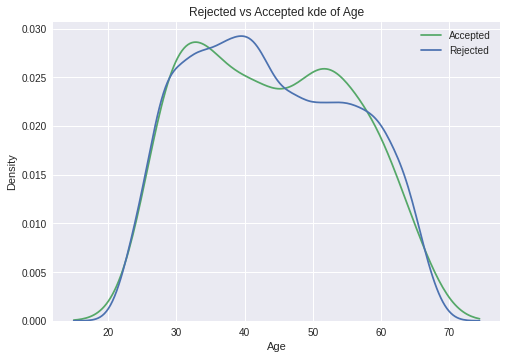

In [ ]:
sns.kdeplot(data=df_app_eda, x='Age', hue='Reject', cumulative=False, common_norm=False, common_grid=True)
plt.title("Rejected vs Accepted kde of Age")
plt.legend(["Accepted", "Rejected"])

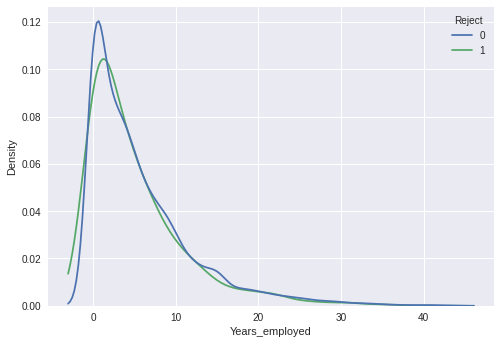

In [ ]:
sns.kdeplot(data=df_app_eda, x='Years_employed', hue='Reject', cumulative=False, common_norm=False, common_grid=True)

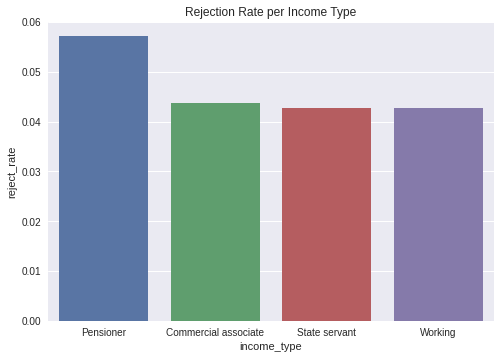

,income_type,times,reject_times,reject_rate
1,Pensioner,1714,98,0.057176
0,Commercial associate,2314,101,0.043647
2,State servant,724,31,0.042818
3,Working,4967,212,0.042682


In [ ]:
gp_total=df_app_eda.groupby(by=['income_type']).size().reset_index(name='times')
gp_reject = df_app_eda[df_app_eda.Reject==1].groupby(by=['income_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['income_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
gp_reject_rate.sort_values('reject_rate',ascending=False, inplace=True)
sns.barplot(x="income_type", y="reject_rate", data=gp_reject_rate)
plt.title('Rejection Rate per Income Type')

plt.show()
gp_reject_rate

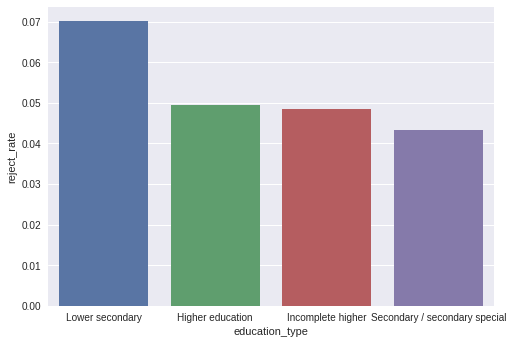

,education_type,times,reject_times,reject_rate
2,Lower secondary,114,8,0.070175
0,Higher education,2460,122,0.049593
1,Incomplete higher,371,18,0.048518
3,Secondary / secondary special,6774,294,0.043401


In [ ]:
gp_total=df_app_eda.groupby(by=['education_type']).size().reset_index(name='times')
gp_reject = df_app_eda[df_app_eda.Reject==1].groupby(by=['education_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['education_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
gp_reject_rate.sort_values('reject_rate',ascending=False, inplace=True)
sns.barplot(x="education_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

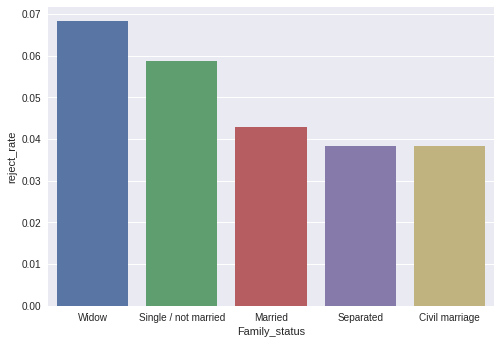

,Family_status,times,reject_times,reject_rate
4,Widow,410,28,0.068293
3,Single / not married,1360,80,0.058824
1,Married,6540,280,0.042813
2,Separated,574,22,0.038328
0,Civil marriage,835,32,0.038323


In [ ]:
gp_total=df_app_eda.groupby(by=['Family_status']).size().reset_index(name='times')
gp_reject = df_app_eda[df_app_eda.Reject==1].groupby(by=['Family_status']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Family_status']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
gp_reject_rate.sort_values('reject_rate',ascending=False, inplace=True)
sns.barplot(x="Family_status", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

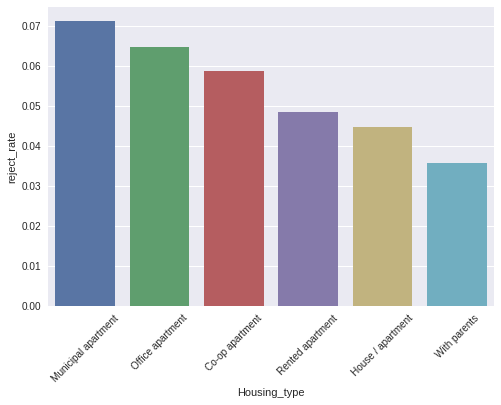

,Housing_type,times,reject_times,reject_rate
2,Municipal apartment,323,23,0.071207
3,Office apartment,77,5,0.064935
0,Co-op apartment,34,2,0.058824
4,Rented apartment,144,7,0.048611
1,House / apartment,8694,389,0.044744
5,With parents,447,16,0.035794


In [ ]:
gp_total=df_app_eda.groupby(by=['Housing_type']).size().reset_index(name='times')
gp_reject = df_app_eda[df_app_eda.Reject==1].groupby(by=['Housing_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Housing_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
gp_reject_rate.sort_values('reject_rate',ascending=False, inplace=True)
sns.barplot(x="Housing_type", y="reject_rate", data=gp_reject_rate)
plt.xticks(rotation=45)
plt.show()
gp_reject_rate

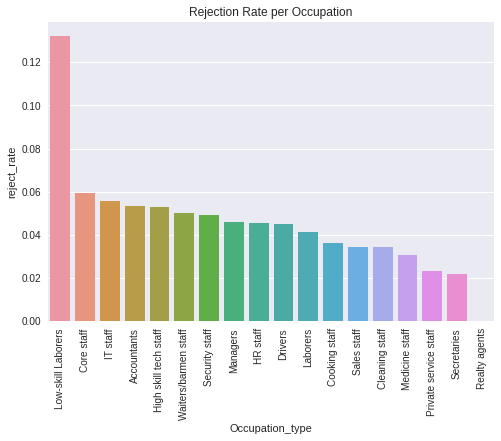

,Occupation_type,times,reject_times,reject_rate
9,Low-skill Laborers,53,7.0,0.132075
3,Core staff,878,52.0,0.059226
7,IT staff,18,1.0,0.055556
0,Accountants,300,16.0,0.053333
6,High skill tech staff,358,19.0,0.053073
17,Waiters/barmen staff,40,2.0,0.050000
16,Security staff,183,9.0,0.049180
10,Managers,783,36.0,0.045977
5,HR staff,22,1.0,0.045455
4,Drivers,623,28.0,0.044944


In [ ]:
gp_total=df_app_eda.groupby(by=['Occupation_type']).size().reset_index(name='times')
gp_reject = df_app_eda[df_app_eda.Reject==1].groupby(by=['Occupation_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Occupation_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
gp_reject_rate.sort_values('reject_rate',ascending=False, inplace=True)
sns.barplot(x="Occupation_type", y="reject_rate", data=gp_reject_rate)
plt.xticks(rotation=90)
plt.title('Rejection Rate per Occupation')

plt.show()
gp_reject_rate

##**Exploring data for Feature Engineering**

In [ ]:
discrete = [
            column for column in X.columns if X[column].dtype != 'O' and X[column].nunique()<=10
]

continuous = [
              column for column in X.columns if X[column].dtype != 'O' and column not in discrete and column != 'ID'
]

categorical = [column for column in X.columns if X[column].dtype == 'O']

vtype_dict = {'discrete': discrete,
              'continuous': continuous,
              'categorical': categorical
}

for key in vtype_dict.keys():
    print(f'There are {len(vtype_dict[key])} {key} variables: {vtype_dict[key]}')

There are 4 discrete variables: ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'currently_employed']
There are 3 continuous variables: ['AMT_INCOME_TOTAL', 'Age', 'Years_employed']
There are 10 categorical variables: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']


Types of problems within the variables

**Missing Values**

In [ ]:
for column in X.columns:
    if df_app[column].isnull().sum() > 0:
        print(column, df_app[column].isnull().mean())

OCCUPATION_TYPE 0.3082621668895977


**Outliers and distributions**

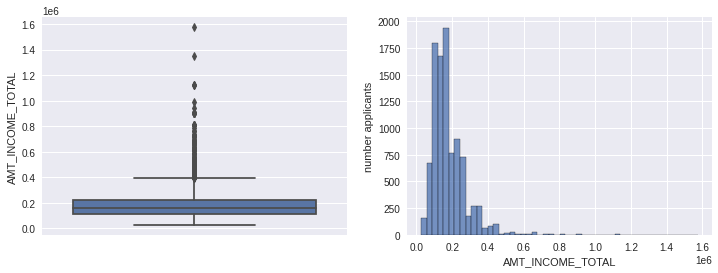

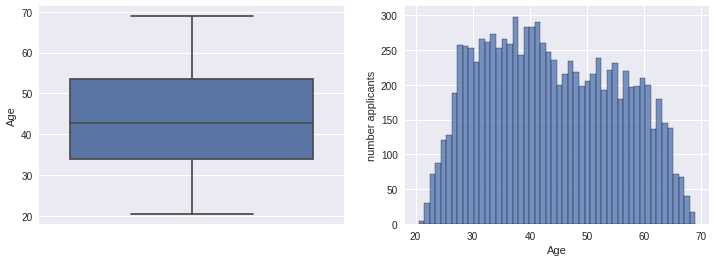

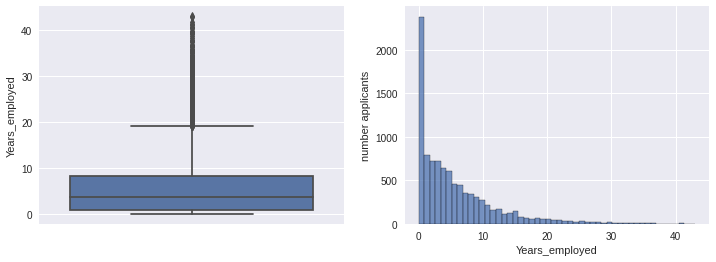

In [ ]:
for column in continuous:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_app[column])
    fig.set_title('')
    fig.set_ylabel(column)

    plt.subplot(1, 2, 2)
    fig = sns.histplot(x=df_app[column], bins=50)
    fig.set_ylabel('number applicants')
    fig.set_xlabel(column)

    plt.show()

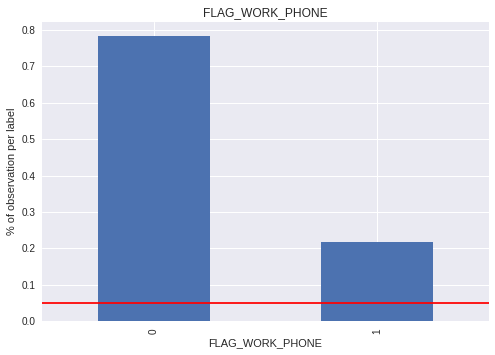

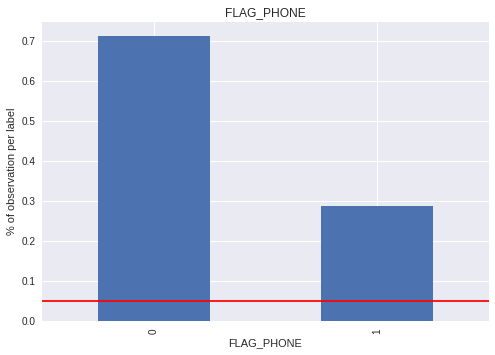

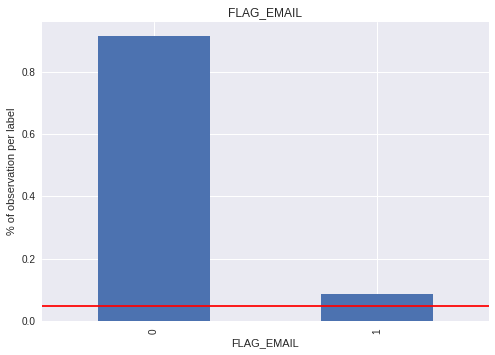

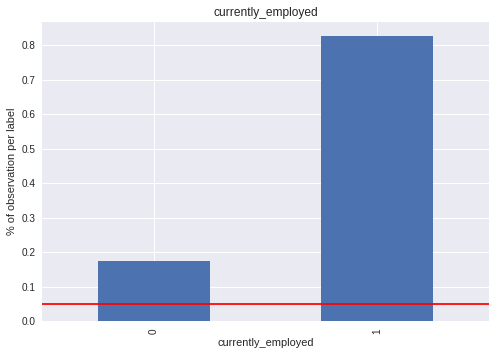

In [ ]:
for column in discrete:
    if column in df_app.columns:
        (df_app.groupby(column)[column].count() / np.float(len(df_app))).plot.bar()
        plt.axhline(y=0.05, color='r', linestyle='-')
        plt.ylabel('% of observation per label')
        plt.title(column)
        plt.show()

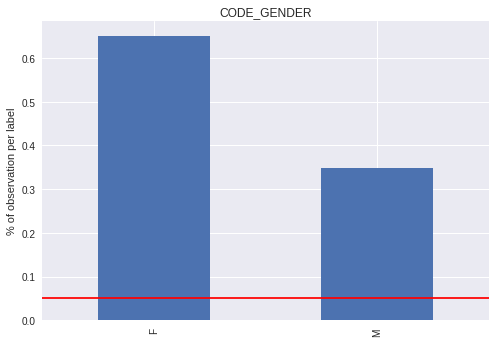

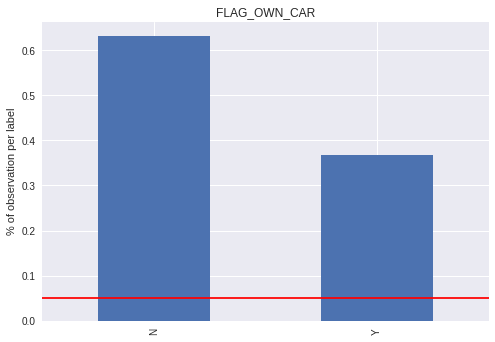

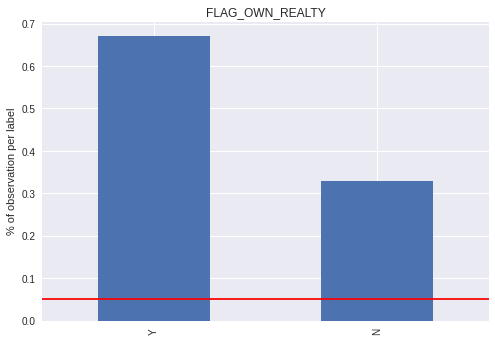

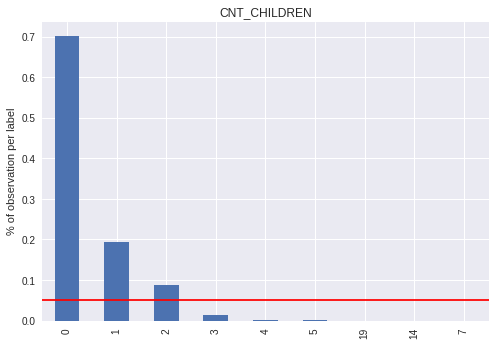

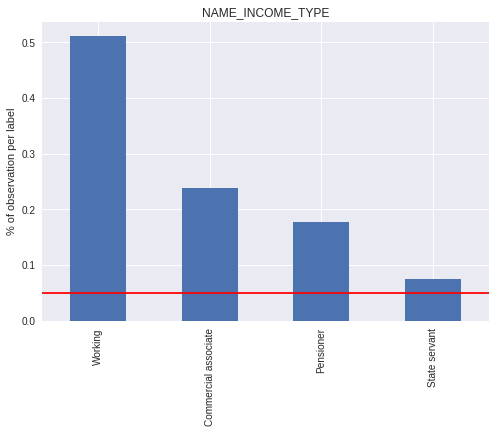

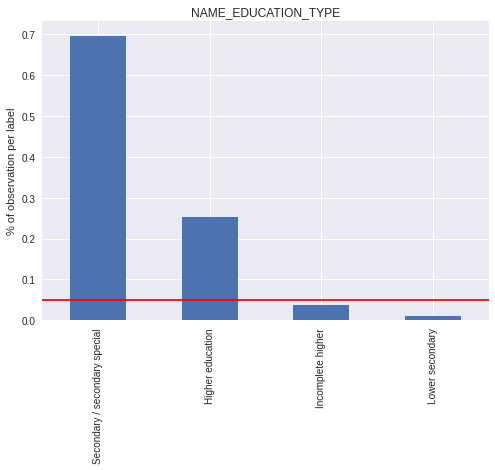

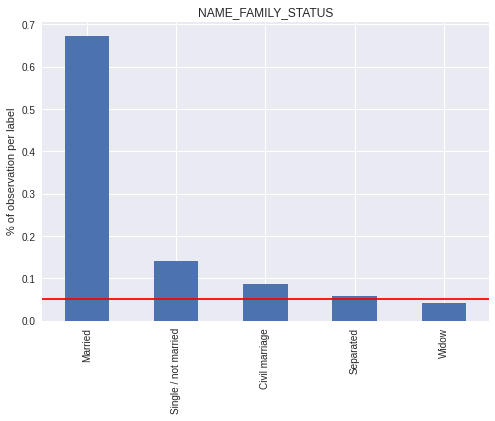

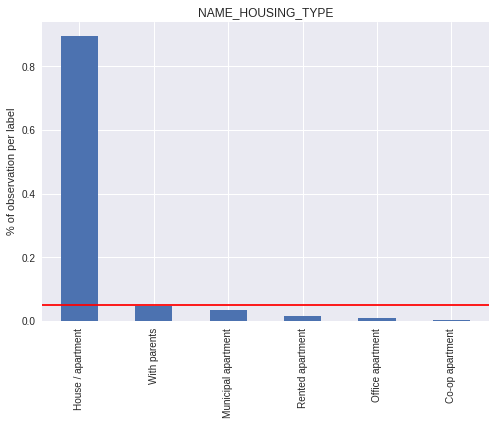

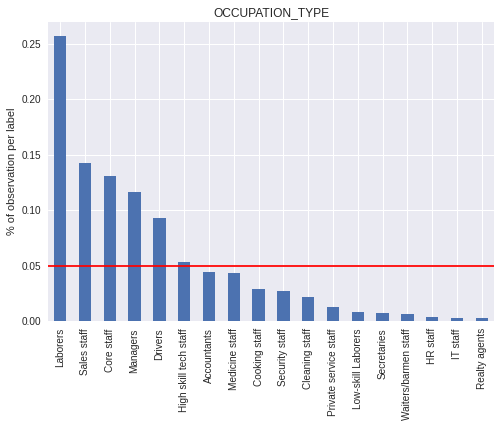

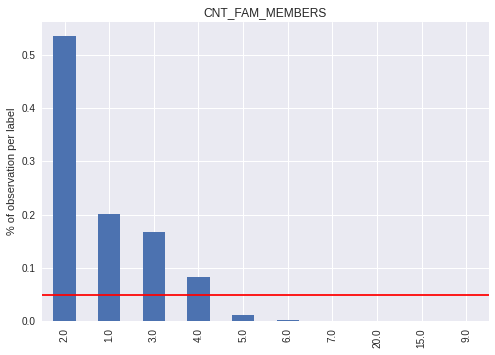

In [ ]:
for column in categorical:
    if column in df_app.columns:
        df_app[column].value_counts(normalize=True).plot.bar()
        plt.axhline(y=0.05, color='r', linestyle='-')
        plt.ylabel('% of observation per label')
        plt.title(column)
        plt.show()


**Conclusions:**


**Continous:**
*   Both Income and years employed variables have alot of outliers and are not normaly distributed. We can solve both of these problems by applying discretisation

**Discrete:**
*   first we will drop FLAG_MOBIL since it has 0 variance and it adds no information
*   both CNT_CHILDREN and FAM_MEMBERS have outliers we can eliminate those by combining rare vlues into a 'rare' category label


**Categorical:**


*   NAME_EDUCATION_TYPE - We drop the 'Academic' category due to low representation
*   NAME_HOUSIN_TYPE - we merge rare labels 1% or less
*   OCCUPATION_TYPE - we merge rare labels 1% or less and add label 'missing' for null values
*   NAME_INCOME_TYPE - since its the only rare label with less then 3 observarions overall, we will drop 'student' label

# ***Making a pipeline***

This pipeline includes all the conclusions from the EDA

In [ ]:
X_pipe = Pipeline([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

])

#**Splitting the data**

In [ ]:
test_size=0.2
X_train, X_test, y_train_df, y_test_df = train_test_split(X, df_y, test_size=test_size, random_state=73)

(_, y1_train), (_,y2_train), (_,y3_train), (_,y4_train), (_,y5_train), (_,y6_train) = y_train_df.iteritems()

(_, y1_test), (_,y2_test), (_,y3_test), (_,y4_test), (_,y5_test), (_,y6_test) = y_test_df.iteritems()

#***Metric of choice***

Type I error in our case: giving a loan (predicting as good) to a 'bad' customer

Type II error in our case: not giving a loan (predicting as bad) to a 'good' customer

making a Type I error would usually mean loosing the loan while a Type II error would mean loosing potential interest revenue.

Since we want to maximize revenue We would like to minimize the Type I error.

Thus we want to focus on increasing the recall of the bad customer. 

We still want to preserve some precision of the bad class.

We finnaly decide to have a metric with a ratio of 9:1 -> recall:presicion

In [ ]:
def pr_score(y_true, y_pred):
    return precision_score(y_true, y_pred, pos_label=bad ,average='binary')

In [ ]:
def pr_score_good(y_true, y_pred):
    return precision_score(y_true, y_pred, pos_label=good ,average='binary')

In [ ]:
def rec_score(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=bad ,average='binary')

In [ ]:
def weighted_score(y_true, y_pred):
    return 0.5 * recall_score(y_true, y_pred, pos_label=bad ,average='binary') + 0.5 * precision_score(y_true, y_pred, pos_label=bad ,average='binary')

In [ ]:
def weighted_score_9_rec(y_true, y_pred, rec_w=0.9, pre_w=0.1):
    return rec_w * recall_score(y_true, y_pred, pos_label=bad ,average='binary') + pre_w * precision_score(y_true, y_pred, pos_label=bad ,average='binary')

In [ ]:
def weighted_score_9_pr(y_true, y_pred, rec_w=0.1, pre_w=0.9):
    return rec_w * recall_score(y_true, y_pred, pos_label=bad ,average='binary') + pre_w * precision_score(y_true, y_pred, pos_label=bad ,average='binary')

In [ ]:
def f1_score_bad(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=bad ,average='binary')

#***Creating a baseline score with Lazy Predict***

and saving the models cv results

##**Tools** 

Reporting function

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy= " , accuracy_score(y_actual, y_predicted))
    print("Precision good customer= " ,precision_score(y_actual, y_predicted))
    print("Recall good customer= " ,recall_score(y_actual, y_predicted))
    print("F1 Score good customer= " ,f1_score(y_actual, y_predicted))
    print("Precision bad customer= " ,pr_score(y_actual, y_predicted))
    print("Recall bad customer= " ,rec_score(y_actual, y_predicted))
    print("F1 Score bad customer= ",f1_score_bad(y_actual, y_predicted) )
    pass

**No resampling pipeline**

In [ ]:
benchmark_pipe = Pipeline([        
    
    #X_pipe - data preprocessing
    ('data prep',
    X_pipe),

    #predictor
    ('rf',
    RandomForestClassifier(random_state=73))

])

**SMOTE Pipeline**

In [ ]:
benchmark_smote_pipe = imbpipeline ([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

    #imbalance
    ('SMOTE',
    SMOTE(random_state=73)),

    #predictor
    ('rf',
    RandomForestClassifier(random_state=73))

])

**Random Under Sampler pipeline**

In [ ]:
benchmark_under_sampling_pipe = imbpipeline ([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

    #imbalance
    ('RandomUnderSampler',
    RandomUnderSampler(random_state=73)),

    #predictor
    ('rf',
    RandomForestClassifier(random_state=73))

])

**SMOTEENN pipline**

In [ ]:
benchmark_over_under_sampling_pipe = imbpipeline ([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

    #imbalance
    ('SMOTEENN',
    SMOTEENN(random_state=73)),

    #predictor
    ('rf',
    RandomForestClassifier(random_state=73))

])

**Cross validation**

In [ ]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=73)

In [ ]:
def get_df_benchmark(estimator ,estimator_name, imbalance_technique, X, y, scoring, scoring_name ,cv):
    # This function gets and estimator and X and y and a customer function and returns the mean and standartd deviation as a dataframe
    score = cross_val_score(estimator, X, y, scoring=scoring, cv=cv)
    mean = np.mean(score)
    std = np.std(score)
    return pd.DataFrame(data={'imbalance_technique':[imbalance_technique], 'estimator':[estimator_name], 'metric':[scoring_name] ,'y':[y.name] ,'mean':[mean], 'std':[std]})

In [ ]:
def plot_cm(estimator, X_trian, y_train, X_test, y_test, classes, normalize=None, title='Confusion matrix', cmap=plt.cm.Blues):
    #This function plots a confusion matrix
    estimator.fit(X_train, y_train)
    plot_confusion_matrix(estimator, X_test, y_test,
                                 cmap=cmap,
                                 normalize=normalize,
                                 display_labels=classes)
    plt.title(title)
    # disp.ax_.set_xticklabels(classes)
    # disp.ax_.set_yticklabels(classes)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None)
    

    plt.show()


In [ ]:
def plot_feture_importance(classifier, columns, title='title', n_largest=None):
    #This function plots feature importance for a classifier
    try:
        feature_importance = classifier.feature_importances_
    except AttributeError:
        feature_importance = np.mean([
                                    tree.feature_importances_ for tree in classifier.estimators_
                                ], axis=0)
    if n_largest is None:
        n_largest = len(classifier.feature_importances_)
    feat_importances = pd.Series(feature_importance, index=columns).nlargest(n_largest)
    result = feat_importances.sort_values().plot(kind='barh')
    plt.title(title, fontsize=16)
    plt.yticks(fontsize=14)
    return result

In [ ]:
def get_y_distribution(X_train, y_train, resampler=None, mask_classes=None):
    if mask_classes:
        y_train = y_train.map(mask_classes)
    if resampler is not None:
            X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
            X_train, y_train = X_train_res, y_train_res

    unique, count = np.unique(y_train, return_counts=True)
    y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
        
    return y_train_smote_value_count

We run the 2 cells bellow to create a csv of benchmark models

In [ ]:
# benchmark_scores = pd.DataFrame()

# for pipe, imbalance_technique in [(benchmark_pipe, 'None'), (benchmark_smote_pipe, 'SMOTE'), (benchmark_under_sampling_pipe, 'RandomUnderSampling'), (benchmark_over_under_sampling_pipe, 'SMOTEENN')]:
#     for y in [y1, y2, y3, y4, y5, y6]:
#         benchmark_scores = pd.concat([benchmark_scores ,get_df_benchmark(pipe, 'Random Forest', imbalance_technique, X, y, make_scorer(weighted_score_9_rec), weighted_score_9_rec.__name__, cv=cv)])


In [ ]:
# benchmark_scores.to_csv('benchmark.csv', index=False)

Reading our benchmark file to analyze our best models for benchmark

In [ ]:
url = 'https://raw.githubusercontent.com/Oz669/Credit-Card-Approval-Prediction/main/benchmark.csv'

resp = requests.get(url)
text = resp.text

with open('benchmark.csv', 'w') as fh:
    fh.write(text)
  
benchmark_scores = pd.read_csv('benchmark.csv')

##Examples of runing different benchmark models for the presentation

In [ ]:
sns.set(font_scale=1.5)

Y1

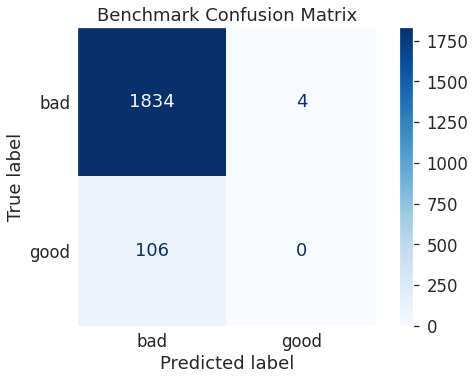

In [ ]:
plot_cm(benchmark_pipe,X_train, y1_train, X_test, y1_test,classes=["bad", "good"], title='Benchmark Confusion Matrix')

Y2

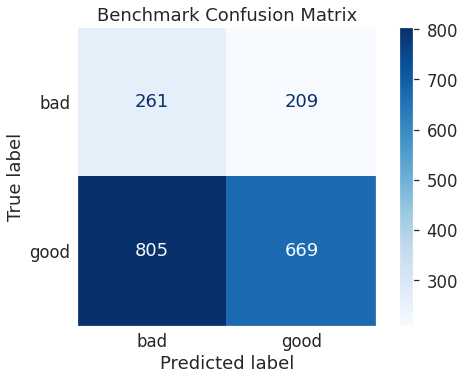

In [ ]:
plot_cm(benchmark_over_under_sampling_pipe, X_train, y2_train, X_test, y2_test, classes=["bad", "good"], title='Benchmark Confusion Matrix')

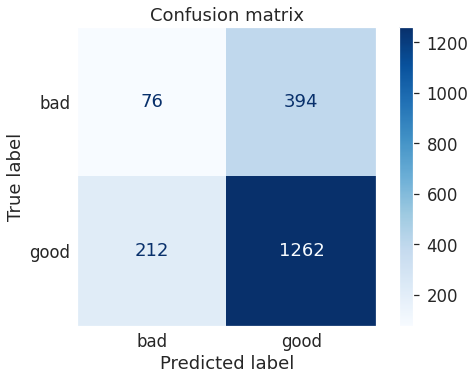

In [ ]:
plot_cm(benchmark_smote_pipe, X_train, y2_train, X_test, y2_test, classes=["bad", "good"])

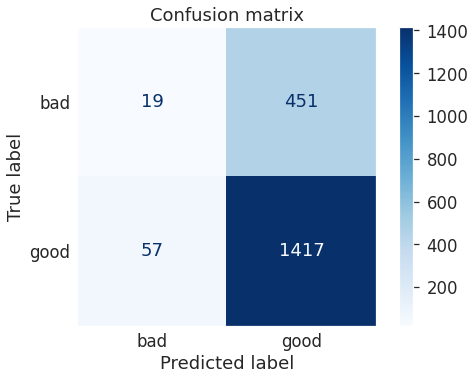

In [ ]:
plot_cm(benchmark_pipe, X_train, y2_train, X_test, y2_test, classes=["bad", "good"])

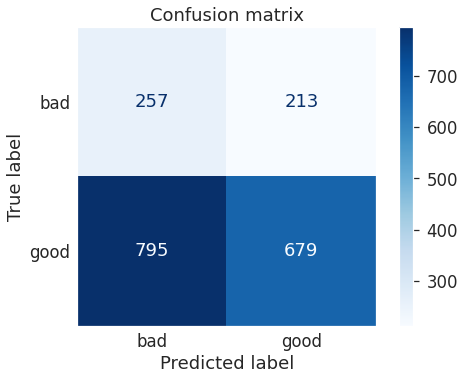

In [ ]:
plot_cm(benchmark_under_sampling_pipe, X_train, y2_train, X_test, y2_test, classes=["bad", "good"])

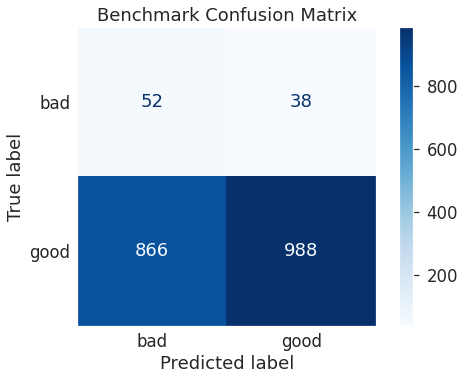

In [ ]:
plot_cm(benchmark_under_sampling_pipe, X_train, y3_train, X_test, y3_test, classes=["bad", "good"], title='Benchmark Confusion Matrix')

##Examples of runing different benchmark models feature importance

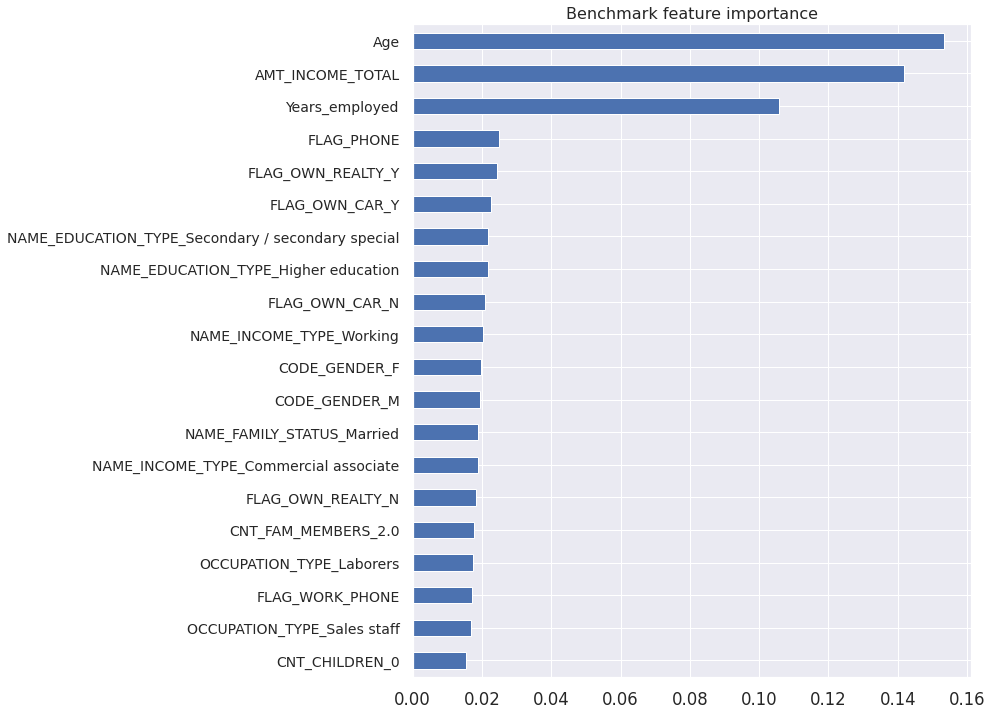

In [ ]:
y2_benchmark_estimator = benchmark_over_under_sampling_pipe
y2_benchmark_estimator.fit(X_train, y2_train)
classifier = y2_benchmark_estimator.named_steps['rf']

plt.figure(figsize=(10,12))
plot_feture_importance(classifier, X_pipe.fit_transform(X_train).columns, n_largest=20, title='Benchmark feature importance')


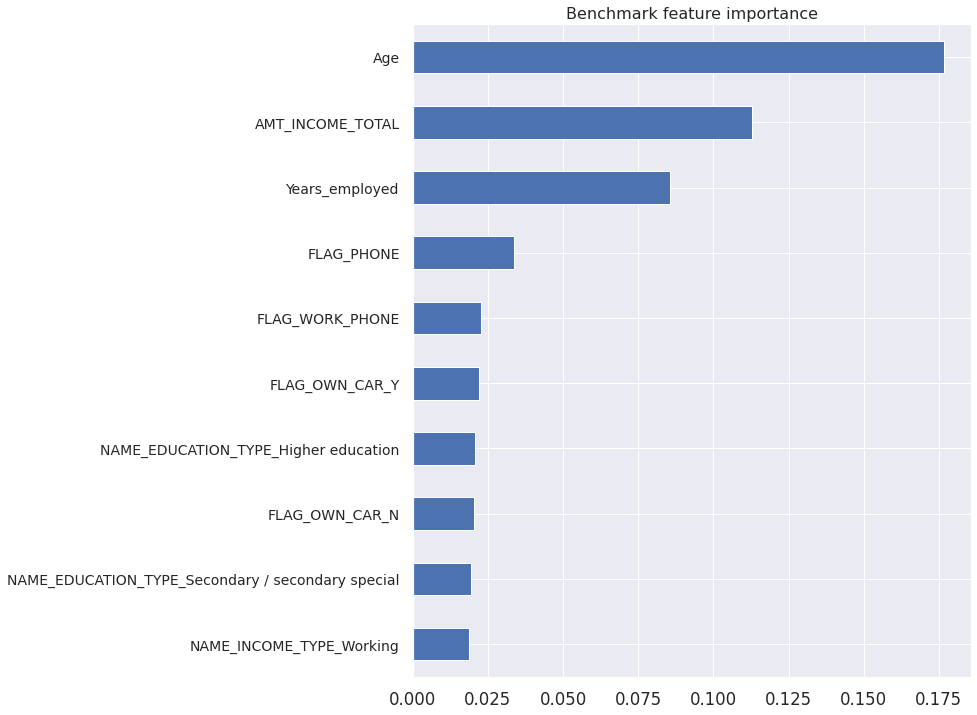

In [ ]:
y3_benchmark_estimator = benchmark_under_sampling_pipe
y3_benchmark_estimator.fit(X_train, y3_train)
classifier = y3_benchmark_estimator.named_steps['rf']

plt.figure(figsize=(10,12))
plot_feture_importance(classifier, X_pipe.fit_transform(X_train).columns, n_largest=10, title='Benchmark feature importance')


##Printing class distributions
after we use different imbalance resampling methods

None

In [ ]:
get_y_distribution(X_train, y1_train, mask_classes={0: 'bad', 1:'good'})

{'bad': 7328, 'good': 447}

SMOTE

In [ ]:
get_y_distribution(X_pipe.fit_transform(X_train), y1_train, resampler=SMOTE() ,mask_classes={0: 'bad', 1:'good'})

{'bad': 7328, 'good': 7328}

Random Under Sampling

In [ ]:
get_y_distribution(X_pipe.fit_transform(X_train), y1_train, resampler=RandomUnderSampler() ,mask_classes={0: 'bad', 1:'good'})

{'bad': 447, 'good': 447}

SMOTEENN

In [ ]:
get_y_distribution(X_pipe.fit_transform(X_train), y1_train, resampler=SMOTEENN() ,mask_classes={0: 'bad', 1:'good'})

{'bad': 4936, 'good': 7014}

##**Testing Lazy Predict (with SMOTE)**

In [ ]:
X_train_piped = X_pipe.fit_transform(X_train)
X_test_piped = X_pipe.transform(X_test)

In [ ]:
def lazy_predict_helper(X_train, y_train, X_test, y_test, score_func, resampler=None, run_pipe=None):
    if resampler is not None:
        X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
        X_train, y_train = X_train_res, y_train_res

    unique, count = np.unique(y_train, return_counts=True)
    y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
    

    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=score_func ,random_state=73)
    models, _ = clf.fit(X_train, X_test, y_train, y_test)
    print(y_train_smote_value_count)
    return models.sort_values(by=score_func.__name__, ascending=False)

In [ ]:
lazy_predict_helper(X_train_piped, y2_train, X_test_piped, y2_test, weighted_score_9_rec, resampler=SMOTEENN(random_state=73))

###**Examples of Comparing Random forests by different resampling and y's**

random forest score 

y_3 Random Under Sampling

In [ ]:
X_train_under, y3_train_under = RUS.fit_resample(X_train_piped, y3_train)

In [ ]:
unique, count = np.unique(y3_train_under, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

In [ ]:
score = weighted_score_9_rec
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=score ,random_state=73)
models, _ = clf.fit(X_train_under, X_test_piped, y3_train_under, y3_test)

In [ ]:
models.sort_values(by='weighted_score_9_rec', ascending=False)

y_4 Random Under Sampling

In [ ]:
X_train_under, y4_train_under = RUS.fit_resample(X_train_piped, y4_train)

In [ ]:
unique, count = np.unique(y4_train_under, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

In [ ]:
score = weighted_score_9_rec
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=score ,random_state=73)
models, _ = clf.fit(X_train_under, X_test_piped, y4_train_under, y4_test)

In [ ]:
models.sort_values(by='weighted_score_9_rec', ascending=False)

y_5 Random Under Sampling

In [ ]:
X_train_under, y5_train_under = RUS.fit_resample(X_train_piped, y5_train)

In [ ]:
unique, count = np.unique(y5_train_under, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

In [ ]:
score = weighted_score_9_rec
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=score ,random_state=73)
models, _ = clf.fit(X_train_under, X_test_piped, y5_train_under, y5_test)

In [ ]:
models.sort_values(by='weighted_score_9_rec', ascending=False)

y_6 Random Under Sampling

In [ ]:
X_train_under, y6_train_under = RUS.fit_resample(X_train_piped, y6_train)

In [ ]:
unique, count = np.unique(y6_train_under, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

In [ ]:
score = weighted_score_9_rec
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=score ,random_state=73)
models, _ = clf.fit(X_train_under, X_test_piped, y6_train_under, y6_test)

In [ ]:
models.sort_values(by='weighted_score_9_rec', ascending=False)

y2 - SMOTENN

In [ ]:
smoteenn = SMOTEENN(random_state=73)

In [ ]:
X_train_under, y2_train_under = smoteenn.fit_resample(X_train_piped, y2_train)

In [ ]:
unique, count = np.unique(y2_train_under, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

In [ ]:
score = weighted_score_9_rec
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=score ,random_state=73)
models, _ = clf.fit(X_train_under, X_test_piped, y2_train_under, y2_test)

In [ ]:
models.sort_values(by='weighted_score_9_rec', ascending=False)

#Running a Lazy predict analysis on all Combinations

The Cell below runs all of the diffrenet combinations (resampling, y's, metrics and models)

In [ ]:
# resamplers = [(None, 'None'),
#               (SMOTE(random_state=73),'over-samplig'),
#                (RandomUnderSampler(random_state=73), 'under-sampling'),
#                (SMOTEENN(random_state=73), 'over-under-sampling')
#                ]

# ys_train = [y1_train, y2_train, y3_train, y4_train, y5_train, y6_train]
# ys_test = [y1_test, y2_test, y3_test, y4_test, y5_test, y6_test]
# ys = zip(ys_train, ys_test, range(6))
# metrics = [
#            (weighted_score_9_rec, 'weighted_score_9_rec')
#            ,(weighted_score_9_pr, 'weighted_score_9_pr')
#            ,(f1_score_bad,'f1_score_bad')
#            ]

# results = pd.DataFrame()
# for y_trin, y_tst, i in [*ys]:
#     for resampler, name in resamplers:
#         for metric, metric_name in metrics:
#             result_temp = lazy_predict_helper(X_pipe.fit_transform(X_train), y_trin, X_pipe.transform(X_test), y_tst, metric, resampler=resampler)
#             if metric_name == 'weighted_score_9_rec':
#                 result = result_temp[['Accuracy',metric_name]]
#                 result['y'] = 'y'+str(i+1)
#                 result['resampling_technique'] = name
#             else:
#                 result[metric_name] = result_temp[metric_name]
#         results = pd.concat([results, result])


In [ ]:
# results[['resampling_technique','y','Accuracy', 'weighted_score_9_rec','weighted_score_9_pr','f1_score_bad']].to_csv('results.csv')

The test results from all the different models combinations

In [ ]:
url = 'https://raw.githubusercontent.com/Oz669/Credit-Card-Approval-Prediction/main/lazy_results_resample.csv'

resp = requests.get(url)
text = resp.text

with open('lazy_results_resample.csv', 'w') as fh:
    fh.write(text)
  
lazy_results_resample = pd.read_csv('lazy_results_resample.csv')

Example of the results for our final metric with y3 and under sampling technique

Text(0.5, 0, 'model')

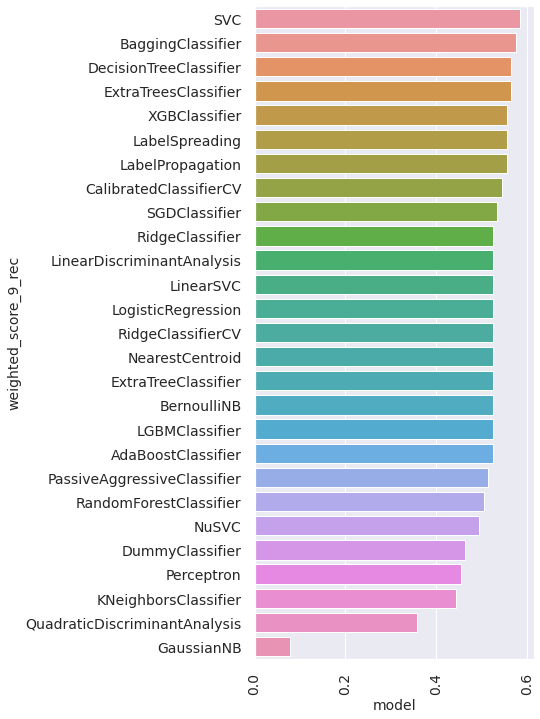

In [ ]:
df = lazy_results_resample.loc[(lazy_results_resample['y']=='y3') & (lazy_results_resample['resampling_technique']=='under-sampling'),['Model','weighted_score_9_rec']]
plt.figure(figsize=(5,12))
sns.barplot(data=df, y='Model', x='weighted_score_9_rec')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('weighted_score_9_rec', fontsize=14)
plt.xlabel('model', fontsize=14)


## Running Cross validation based on the best models from the Lazy predict analysis

In [ ]:
def get_pipeline(pipe_type ,predictor_class):
    #This function returns a pipeline based on resamples from (smote, random under sampling,smoteenn, no resampling) and a classifier of the users choice
    if pipe_type == 'SMOTE':
        predict_pipe = imbpipeline ([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

    #imbalance
    ('SMOTE',
    SMOTE(random_state=73)),

    #predictor
    ('predictor',
    predictor_class)

])
    elif pipe_type == 'RUS':
        predict_pipe = imbpipeline ([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

    #imbalance
    ('RandomUnderSampler',
    RandomUnderSampler(random_state=73)),

    #predictor
    ('predictor',
    predictor_class)

])
    elif pipe_type == 'SMOTEENN':
        predict_pipe = imbpipeline ([        
    
    # missing data imputation
    ('imputer_add_missing',
     mdi.AddMissingIndicator(variables=['OCCUPATION_TYPE'])),
    
    ('inputer_cat',
     mdi.CategoricalImputer(fill_value='missing', variables=['OCCUPATION_TYPE'])),
     
    # categorical encoding
    ('encoder_rare_label',
    ce.RareLabelEncoder(tol=0.01, n_categories=3, variables=['OCCUPATION_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE'])),
    
    ('categorical_encoder',
    ce.OneHotEncoder(variables=categorical+['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])),

    # discretization
    ('discretization',
    dsc.EqualFrequencyDiscretiser(q=15, variables=['AMT_INCOME_TOTAL', 'Years_employed'])),

    #Scaling
    ('scaling',
    SklearnTransformerWrapper(transformer=StandardScaler(), variables=continuous)),

    #imbalance
    ('SMOTEENN',
    SMOTEENN(random_state=73)),

    #predictor
    ('predictor',
    predictor_class)

])
    else:
        predict_pipe = Pipeline([        
        
        #X_pipe - data preprocessing
        ('data prep',
        X_pipe),

        #predictor
        ('predictor',
        predictor_class)

    ])
    return predict_pipe

###**y_1 Best Model**

In [ ]:
get_df_benchmark(
                 estimator=get_pipeline(pipe_type=None,predictor_class=LogisticRegression(random_state=73, max_iter=1000)),
                 estimator_name='logistict regression',
                 imbalance_technique=None,
                 X=X_train,
                 y=y1_train,
                 scoring=make_scorer(weighted_score_9_rec),
                 scoring_name='weighted_score_9_rec',
                 cv=cv
                 )

,imbalance_technique,estimator,metric,y,mean,std
0,None,logistict regression,weighted_score_9_rec,y_1,0.994277,0.0


**y_1 plot confusion_matrix**

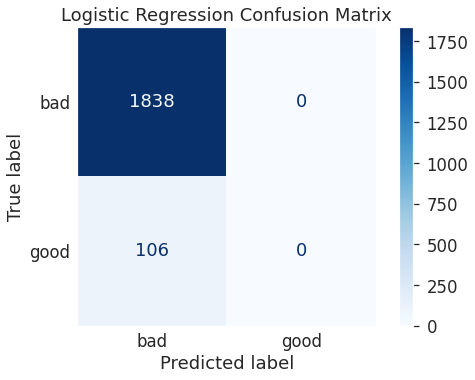

In [ ]:
plot_cm(get_pipeline(pipe_type=None,predictor_class=LogisticRegression(random_state=73, max_iter=1000)),
        X_train,
        y1_train,
        X_test,
        y1_test,
        classes=["bad", "good"],
        title='Logistic Regression Confusion Matrix'
        )

###**y_2 Best Model**

In [ ]:
get_df_benchmark(
                 estimator=get_pipeline(pipe_type='SMOTEENN',predictor_class=AdaBoostClassifier(random_state=73)),
                 estimator_name='AdaBoostClassifier',
                 imbalance_technique='SMOTEEN',
                 X=X_train,
                 y=y2_train,
                 scoring=make_scorer(weighted_score_9_rec),
                 scoring_name='weighted_score_9_rec',
                 cv=cv
                 )

,imbalance_technique,estimator,metric,y,mean,std
0,SMOTEEN,AdaBoostClassifier,weighted_score_9_rec,y_2,0.653744,0.024307


**y_2 plot confusion_matrix**

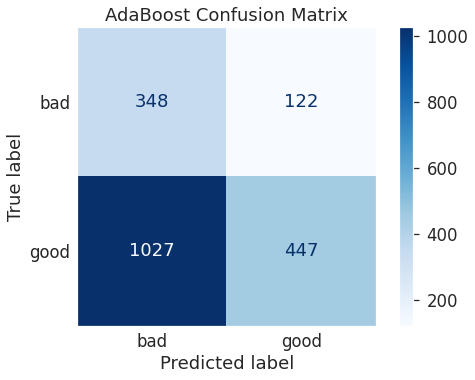

In [ ]:
plot_cm(get_pipeline(pipe_type='SMOTEENN',predictor_class=AdaBoostClassifier(random_state=73)),
        X_train,
        y2_train,
        X_test,
        y2_test,
        classes=["bad", "good"],
        title='AdaBoost Confusion Matrix'
        )

**y_2 best model feature importance**

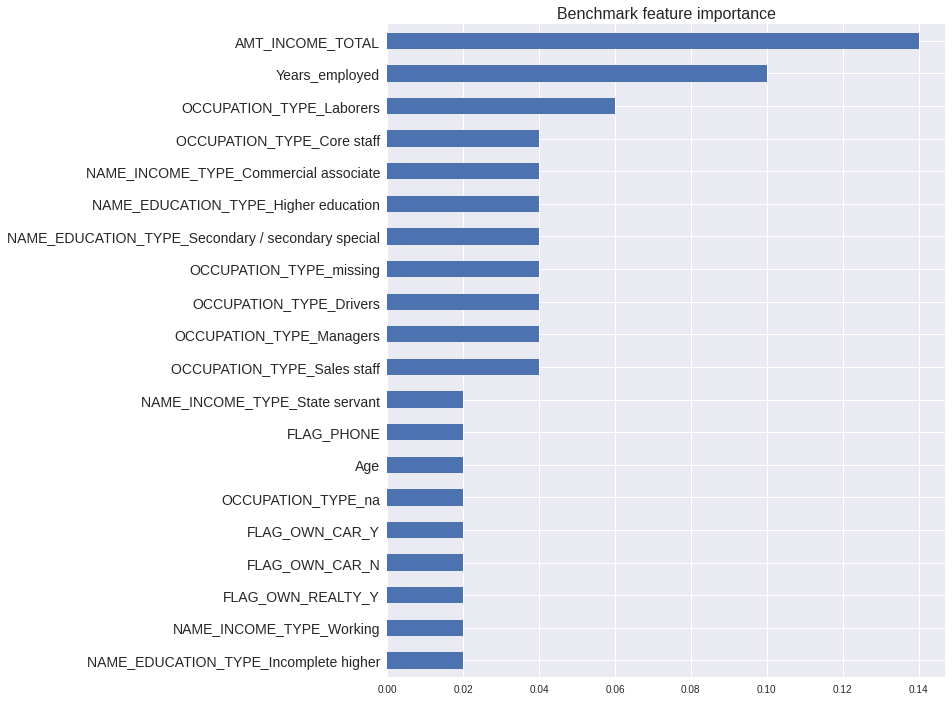

In [ ]:
y2_estimator = get_pipeline(pipe_type='SMOTEENN',predictor_class=AdaBoostClassifier(random_state=73))
y2_estimator.fit(X_train, y2_train)
classifier = y2_estimator.named_steps['predictor']

plt.figure(figsize=(10,12))
plot_feture_importance(classifier, X_pipe.fit_transform(X_train).columns, n_largest=20, title='Benchmark feature importance')


###**y_3 Best Model**



In [ ]:
get_df_benchmark(
                 estimator=get_pipeline(pipe_type='RUS',predictor_class=BaggingClassifier(random_state=73)),
                 estimator_name='BaggingClassifier',
                 imbalance_technique='Random Under Sampling',
                 X=X_train,
                 y=y3_train,
                 scoring=make_scorer(weighted_score_9_rec),
                 scoring_name='weighted_score_9_rec',
                 cv=cv
                 )

,imbalance_technique,estimator,metric,y,mean,std
0,Random Under Sampling,BaggingClassifier,weighted_score_9_rec,y_3,0.591381,0.043376


**y_3 plot confusion_matrix**

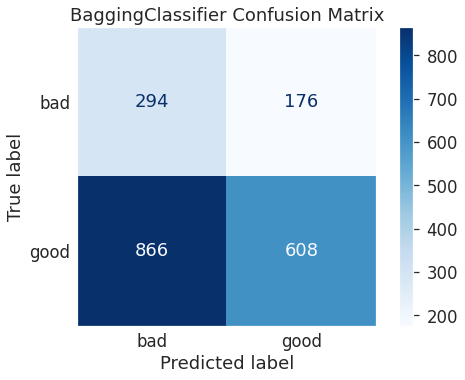

In [ ]:
plot_cm(get_pipeline(pipe_type='RUS',predictor_class=BaggingClassifier(random_state=73)),
        X_train,
        y2_train,
        X_test,
        y2_test,
        classes=["bad", "good"],
        title='BaggingClassifier Confusion Matrix'
        )

**y_3 best model feature importance**

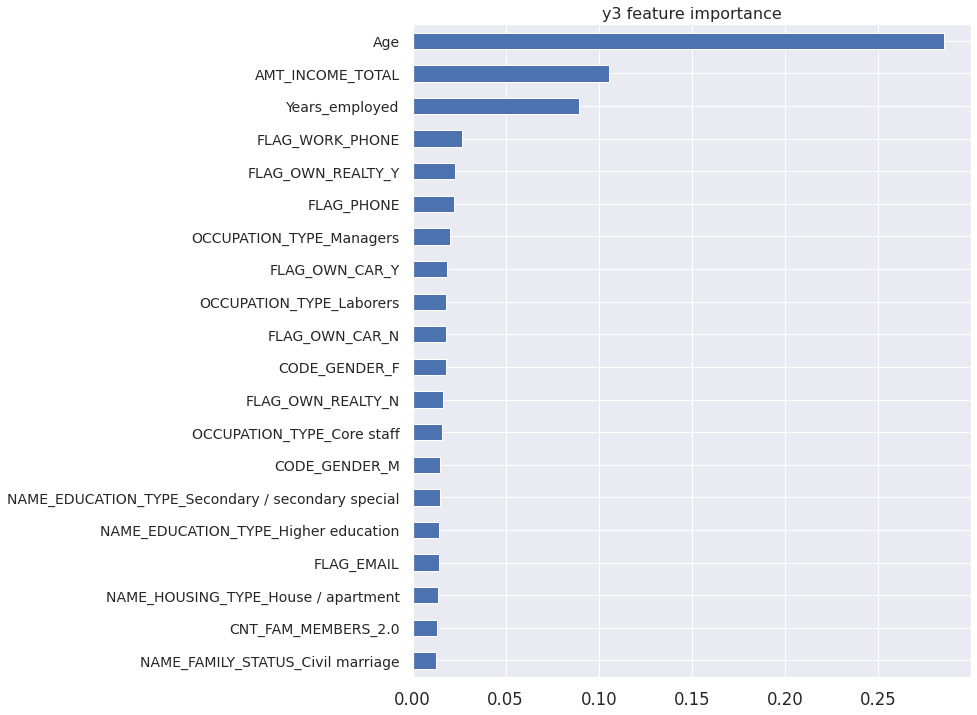

In [ ]:
y3_estimator = get_pipeline(pipe_type='RUS',predictor_class=BaggingClassifier(random_state=73))
y3_estimator.fit(X_train, y3_train)
classifier = y3_estimator.named_steps['predictor']

# feature_importances = np.mean([
#     tree.feature_importances_ for tree in classifier.estimators_
# ], axis=0)
# feature_importances
plt.figure(figsize=(10,12))
plot_feture_importance(classifier, X_pipe.fit_transform(X_train).columns, n_largest=20, title='y3 feature importance')
